# **Chapter 9: Unsupervised Learning Techniques**
- Overview dan aplikasi clustering
- Algoritma K-Means dan contoh penggunaannya
- Menentukan jumlah cluster optimal
- Clustering menggunakan DBSCAN
- Gaussian Mixture Models (GMM) dan deteksi anomali

# **Clustering Overview**

Clustering adalah proses mengelompokkan data yang mirip ke dalam grup (cluster) **tanpa menggunakan label**.

Beberapa aplikasi umum dari clustering:
- Segmentasi pelanggan (customer segmentation)
- Deteksi anomali (anomaly detection)
- Analisis data
- Segmentasi gambar, dan banyak lainnya

# **K-Means Clustering**

- Membagi data menjadi *k* cluster dengan meminimalkan variansi dalam tiap cluster (intra-cluster variance).
- Memerlukan jumlah *k* cluster ditentukan di awal.
- Peka terhadap inisialisasi awal; gunakan `k-means++` untuk inisialisasi yang lebih baik.
- Cepat dan scalable untuk berbagai tugas.

### Contoh implementasi K-Means:

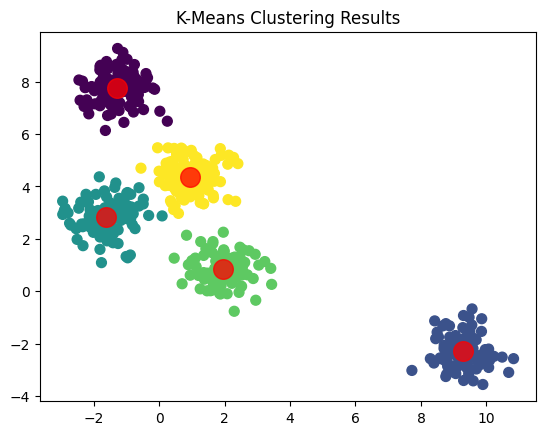

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means Clustering Results')
plt.show()

# **Menentukan Jumlah Cluster**
Beberapa metode umum:

Elbow method: Plot antara jumlah cluster (k) dengan inertia (total dalam-cluster sum of squares).

Silhouette score: Mengukur kualitas cluster berdasarkan jarak antar dan dalam cluster.

### **Contoh elbow plot:**

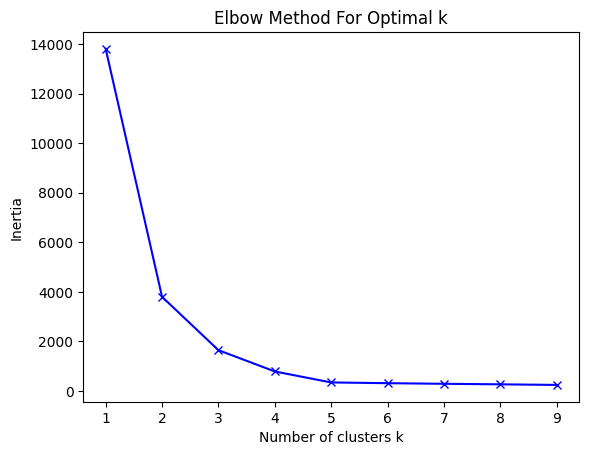

In [2]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


# **DBSCAN Clustering**
- Merupakan algoritma clustering berbasis density.
- Cluster didefinisikan sebagai area padat yang dipisahkan oleh area berisi data jarang (low-density).
- Tidak memerlukan jumlah cluster ditentukan sebelumnya.
- Dapat mendeteksi outlier sebagai noise.

### **Contoh implementasi DBSCAN:**

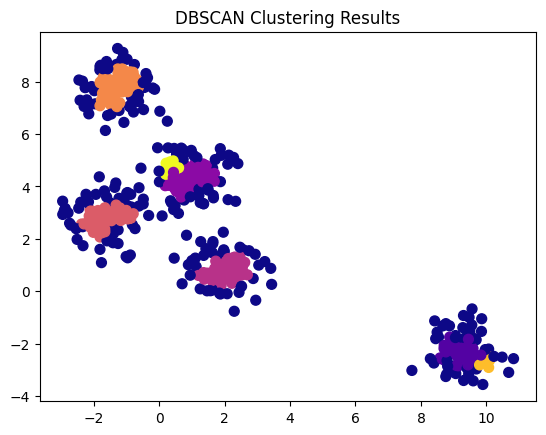

In [3]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=10)
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='plasma', s=50)
plt.title('DBSCAN Clustering Results')
plt.show()


# **Gaussian Mixture Models (GMM)**
- GMM mengasumsikan data berasal dari campuran distribusi Gaussian.
- Setiap cluster dimodelkan sebagai Gaussian dengan mean dan kovarian tertentu.
- Mendukung soft clustering berdasarkan probabilitas keanggotaan.

### **Contoh implementasi GMM:**

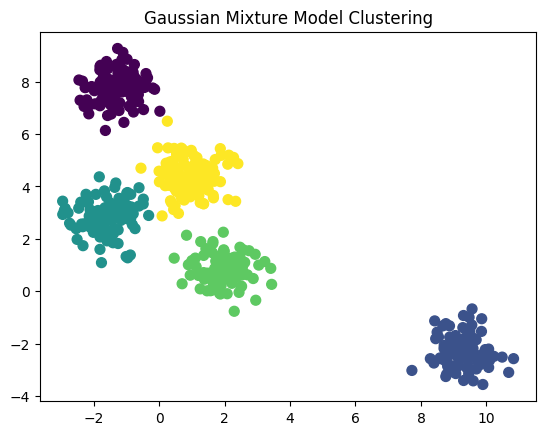

In [4]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=0)
gmm_labels = gmm.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', s=50)
plt.title('Gaussian Mixture Model Clustering')
plt.show()


# **Anomaly Detection dengan GMM**
- Titik data di wilayah dengan density rendah (berdasarkan model GMM) dianggap sebagai potensi anomali.
- Kita bisa menetapkan ambang batas untuk mendeteksi persentase data terbawah sebagai anomali.

### **Contoh deteksi anomali:**

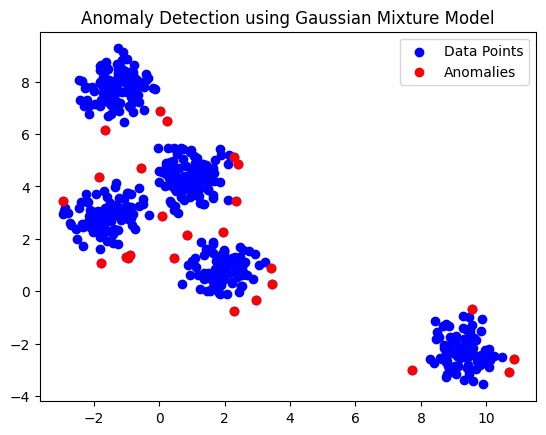

In [5]:
import numpy as np

densities = gmm.score_samples(X)
threshold = np.percentile(densities, 5)  # 5% terendah
anomalies = X[densities < threshold]

plt.scatter(X[:, 0], X[:, 1], c='blue', label='Data Points')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', label='Anomalies')
plt.legend()
plt.title('Anomaly Detection using Gaussian Mixture Model')
plt.show()


# **Summary**
- Clustering adalah tugas penting dalam unsupervised learning dengan banyak aplikasi.
- K-Means cepat dan sederhana, tapi butuh k ditentukan sejak awal dan asumsi bentuk cluster bulat.
- DBSCAN dapat mendeteksi cluster dengan bentuk beragam dan menangani noise.
- GMM menyediakan soft assignment berbasis probabilistik dan cocok untuk deteksi anomali.
- Pemilihan metode dan parameter terbaik tergantung pada dataset dan tujuan analisis.